#Tópicos Avanzados de Computación II
##Dr. Carlos Villaseñor
### Lección 5 -  Entrenando Redes Neuronales Profundas parte I






In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import datetime

In [2]:
raw_dataset = pd.read_csv('./DataSets/cancer.csv')

dataset = raw_dataset.copy()
print(dataset)

     Clump  UnifSize  UnifShape  MargAdh  SingEpiSize  BareNuc  BlandChrom  \
0        5         1          1        1            2        1           3   
1        5         4          4        5            7       10           3   
2        3         1          1        1            2        2           3   
3        6         8          8        1            3        4           3   
4        4         1          1        3            2        1           3   
..     ...       ...        ...      ...          ...      ...         ...   
678      3         1          1        1            3        2           1   
679      2         1          1        1            2        1           1   
680      5        10         10        3            7        3           8   
681      4         8          6        4            3        4          10   
682      4         8          8        5            4        5          10   

     NormNucl  Mit  Class  
0           1    1      1  
1      

In [3]:
dataset.isna().sum()

Clump          0
UnifSize       0
UnifShape      0
MargAdh        0
SingEpiSize    0
BareNuc        0
BlandChrom     0
NormNucl       0
Mit            0
Class          0
dtype: int64

In [4]:
dataset = dataset.dropna()

In [5]:
dataset.tail()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
678,3,1,1,1,3,2,1,1,1,1
679,2,1,1,1,2,1,1,1,1,1
680,5,10,10,3,7,3,8,10,2,0
681,4,8,6,4,3,4,10,6,1,0
682,4,8,8,5,4,5,10,4,1,0


In [6]:
x = np.asanyarray(dataset.drop(columns=['Class']))
y = np.asanyarray(dataset[['Class']])
x = StandardScaler().fit_transform(x)
print(x.shape)
print(y.shape)

(683, 9)
(683, 1)


In [7]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=0)

In [8]:
def build_model():
    model = keras.Sequential()
    model.add(keras.layers.Dense(32, kernel_initializer='glorot_uniform',
                                 activation='relu', input_shape=[x.shape[1]]))
    model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.Dense(8, activation='tanh'))
    model.add(keras.layers.Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer=keras.optimizers.Adam())
    return model


In [9]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                320       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 264       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 593
Trainable params: 593
Non-trainable params: 0
_________________________________________________________________


In [10]:
log_dir = "DL_L05_A05/logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

history = model.fit(xtrain, ytrain,
                    batch_size=150, epochs=200,
                    validation_split=0.2, verbose=1, callbacks=[tensorboard_callback])

Epoch 1/200
3/3 [==============================] - 1s 157ms/step - loss: 0.6505 - val_loss: 0.6159
Epoch 2/200
3/3 [==============================] - 0s 64ms/step - loss: 0.6109 - val_loss: 0.5844
Epoch 3/200
3/3 [==============================] - 0s 53ms/step - loss: 0.5834 - val_loss: 0.5545
Epoch 4/200
3/3 [==============================] - 0s 62ms/step - loss: 0.5505 - val_loss: 0.5264
Epoch 5/200
3/3 [==============================] - 0s 54ms/step - loss: 0.5278 - val_loss: 0.4999
Epoch 6/200
3/3 [==============================] - 0s 54ms/step - loss: 0.5027 - val_loss: 0.4749
Epoch 7/200
3/3 [==============================] - 0s 54ms/step - loss: 0.4752 - val_loss: 0.4514
Epoch 8/200
3/3 [==============================] - 0s 54ms/step - loss: 0.4515 - val_loss: 0.4293
Epoch 9/200
3/3 [==============================] - 0s 53ms/step - loss: 0.4356 - val_loss: 0.4085
Epoch 10/200
3/3 [==============================] - 0s 51ms/step - loss: 0.4015 - val_loss: 0.3889
Epoch 11/200
3/3 [

Epoch 84/200
3/3 [==============================] - 0s 65ms/step - loss: 0.0868 - val_loss: 0.0962
Epoch 85/200
3/3 [==============================] - 0s 65ms/step - loss: 0.0934 - val_loss: 0.0960
Epoch 86/200
3/3 [==============================] - 0s 60ms/step - loss: 0.0981 - val_loss: 0.0959
Epoch 87/200
3/3 [==============================] - 0s 72ms/step - loss: 0.0893 - val_loss: 0.0958
Epoch 88/200
3/3 [==============================] - 0s 69ms/step - loss: 0.0922 - val_loss: 0.0956
Epoch 89/200
3/3 [==============================] - 0s 69ms/step - loss: 0.0931 - val_loss: 0.0955
Epoch 90/200
3/3 [==============================] - 0s 68ms/step - loss: 0.0902 - val_loss: 0.0953
Epoch 91/200
3/3 [==============================] - 0s 61ms/step - loss: 0.0882 - val_loss: 0.0952
Epoch 92/200
3/3 [==============================] - 0s 63ms/step - loss: 0.0922 - val_loss: 0.0951
Epoch 93/200
3/3 [==============================] - 0s 66ms/step - loss: 0.0933 - val_loss: 0.0950
Epoch 94/2

3/3 [==============================] - 0s 66ms/step - loss: 0.0691 - val_loss: 0.0943
Epoch 167/200
3/3 [==============================] - 0s 76ms/step - loss: 0.0628 - val_loss: 0.0942
Epoch 168/200
3/3 [==============================] - 0s 71ms/step - loss: 0.0704 - val_loss: 0.0942
Epoch 169/200
3/3 [==============================] - 0s 71ms/step - loss: 0.0661 - val_loss: 0.0940
Epoch 170/200
3/3 [==============================] - 0s 77ms/step - loss: 0.0716 - val_loss: 0.0942
Epoch 171/200
3/3 [==============================] - 0s 65ms/step - loss: 0.0678 - val_loss: 0.0942
Epoch 172/200
3/3 [==============================] - 0s 67ms/step - loss: 0.0678 - val_loss: 0.0944
Epoch 173/200
3/3 [==============================] - 0s 66ms/step - loss: 0.0713 - val_loss: 0.0944
Epoch 174/200
3/3 [==============================] - 0s 69ms/step - loss: 0.0653 - val_loss: 0.0943
Epoch 175/200
3/3 [==============================] - 0s 78ms/step - loss: 0.0662 - val_loss: 0.0940
Epoch 176/200


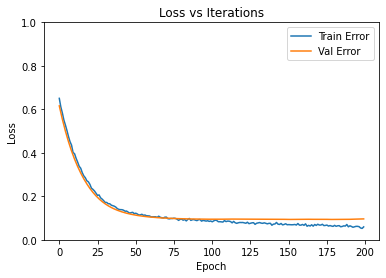

In [11]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    plt.figure()
    plt.title('Loss vs Iterations')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'],
             label='Train Error')
    plt.plot(hist['epoch'], hist['val_loss'],
             label='Val Error')
    plt.ylim([0, 1])
    plt.legend()


plot_history(history)

In [12]:
score = model.evaluate(xtest, ytest)

5/5 [==============================] - 0s 2ms/step - loss: 0.0860


Epoch 1/200
3/3 [==============================] - 1s 142ms/step - loss: 0.5760 - val_loss: 0.5388
Epoch 2/200
3/3 [==============================] - 0s 57ms/step - loss: 0.5402 - val_loss: 0.5047
Epoch 3/200
3/3 [==============================] - 0s 56ms/step - loss: 0.5051 - val_loss: 0.4733
Epoch 4/200
3/3 [==============================] - 0s 60ms/step - loss: 0.4730 - val_loss: 0.4442
Epoch 5/200
3/3 [==============================] - 0s 59ms/step - loss: 0.4455 - val_loss: 0.4175
Epoch 6/200
3/3 [==============================] - 0s 55ms/step - loss: 0.4063 - val_loss: 0.3929
Epoch 7/200
3/3 [==============================] - 0s 69ms/step - loss: 0.3891 - val_loss: 0.3704
Epoch 8/200
3/3 [==============================] - 0s 59ms/step - loss: 0.3692 - val_loss: 0.3496
Epoch 9/200
3/3 [==============================] - 0s 57ms/step - loss: 0.3461 - val_loss: 0.3305
Epoch 10/200
3/3 [==============================] - 0s 60ms/step - loss: 0.3365 - val_loss: 0.3129
Epoch 11/200
3/3 [

Epoch 84/200
3/3 [==============================] - 0s 65ms/step - loss: 0.0881 - val_loss: 0.0829
Epoch 85/200
3/3 [==============================] - 0s 67ms/step - loss: 0.0900 - val_loss: 0.0828
Epoch 86/200
3/3 [==============================] - 0s 58ms/step - loss: 0.0971 - val_loss: 0.0827
Epoch 87/200
3/3 [==============================] - 0s 59ms/step - loss: 0.0880 - val_loss: 0.0827
Epoch 88/200
3/3 [==============================] - 0s 73ms/step - loss: 0.0875 - val_loss: 0.0827
Epoch 89/200
3/3 [==============================] - 0s 62ms/step - loss: 0.0886 - val_loss: 0.0827
Epoch 90/200
3/3 [==============================] - 0s 64ms/step - loss: 0.0945 - val_loss: 0.0827
Epoch 91/200
3/3 [==============================] - 0s 64ms/step - loss: 0.0940 - val_loss: 0.0829
Epoch 92/200
3/3 [==============================] - 0s 62ms/step - loss: 0.0812 - val_loss: 0.0829
Epoch 93/200
3/3 [==============================] - 0s 62ms/step - loss: 0.0906 - val_loss: 0.0830
Epoch 94/2

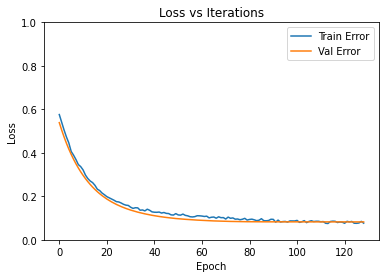

In [13]:
log_dir = "DL_L05_A05/logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback_es = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=20)
model = build_model()
history = model.fit(xtrain, ytrain,
                    batch_size=150, epochs=200,
                    validation_split=0.2, verbose=1, callbacks=[es, tensorboard_callback_es])
plot_history(history)
score = model.evaluate(xtest, ytest)

In [14]:
%load_ext tensorboard
%tensorboard --logdir DL_L05_A05/logs/fit